Put-Call Parity holds: True
Call Price: 10.45
Put Price: 5.57


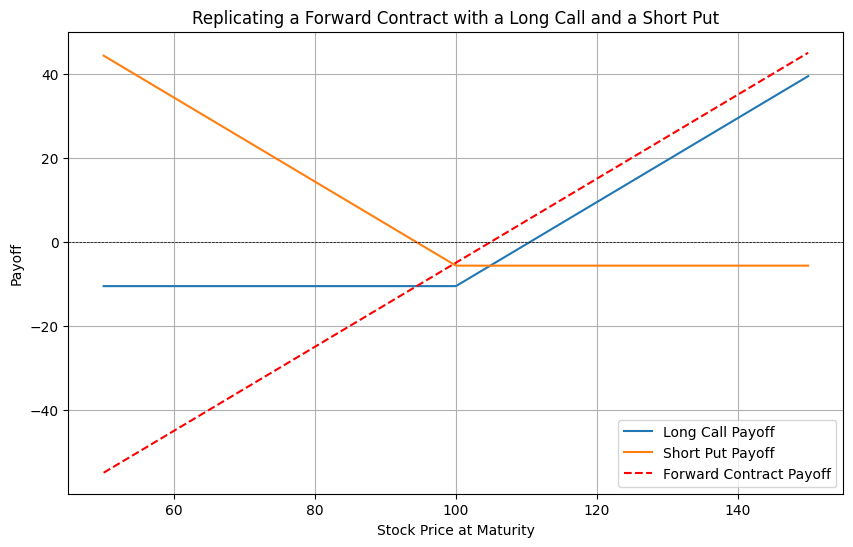

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes formula for European call and put options
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    return price

# Verify put-call parity
def verify_put_call_parity(S, K, T, r, sigma):
    call_price = black_scholes(S, K, T, r, sigma, 'call')
    put_price = black_scholes(S, K, T, r, sigma, 'put')

    lhs = call_price - put_price
    rhs = S - K * np.exp(-r * T)

    return np.isclose(lhs, rhs), call_price, put_price

# Example parameters
S = 100    # Current stock price
K = 100    # Strike price
T = 1      # Time to maturity (in years)
r = 0.05   # Risk-free rate
sigma = 0.2  # Volatility

# Verify put-call parity
parity_holds, call_price, put_price = verify_put_call_parity(S, K, T, r, sigma)

print(f"Put-Call Parity holds: {parity_holds}")
print(f"Call Price: {call_price:.2f}")
print(f"Put Price: {put_price:.2f}")

# Generate stock prices for plotting
stock_prices = np.linspace(50, 150, 500)

# Calculate the payoff of a long call and a short put to form a forward contract
long_call_payoff = np.maximum(stock_prices - K, 0) - call_price
short_put_payoff = np.maximum(K - stock_prices, 0) - put_price
forward_contract_payoff = long_call_payoff - short_put_payoff

# Plot the payoffs
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, long_call_payoff, label='Long Call Payoff')
plt.plot(stock_prices, short_put_payoff, label='Short Put Payoff')
plt.plot(stock_prices, forward_contract_payoff, label='Forward Contract Payoff', linestyle='--', color='red')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('Stock Price at Maturity')
plt.ylabel('Payoff')
plt.title('Replicating a Forward Contract with a Long Call and a Short Put')
plt.legend()
plt.grid(True)
plt.show()
